### Esercizio 1

Sia $C$ una variabile aleatoria distribuita secondo unun modello binomiale di parametri $n_C$ e $p_C$ $\in$ $[0, 1]$. Nel resto del tema d'esame $C$ modellerà il numero di bottiglie d'acqua minerale di una certa marca che un nucleo familiare acquista nell'arco di una settimana.

**1.** Quali valori può assumere il parametro $n_C$? e quali valori può assumere $C$? Giustificate la risposta

$n_C$ può assumere valori interi maggiori o uguali a 0.
$C$ può assumere valori tra 0 e $n_C$

**2.** Indichiamo con $f_C$ la funzione di massa di probabilità della variabile aleatoria $C$. Scrivete la forma analitica di $f_C$ in dipendenza dai parametri indicati al punto precedente e di una generica specificazione $x$ della variabile aleatoria $C$.

$f_C$ = $\binom{n_C}{x}p_C^x(1-p_C)^{n_c-x}$

**3.** Fissiamo, **solo in questo punto**, $n_C$ = 20 e $p_C$ = 0.8. Utilizzando il computer visualizzate graficamente l'andamento di $f_C$($x$) al variare di $x$, **nella zona in cui questa funzione assume valori sensibilmente diversi da zero**. Come avete scelto i valori minimo e massimo per $x$?

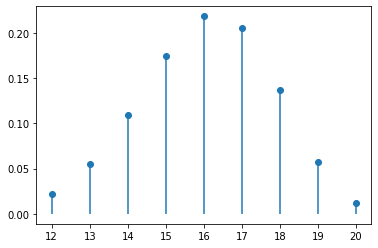

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import pandas as pd
import math
import matplotlib.pyplot as plt

C = st.binom(n=20, p=0.8)
inizio = int(C.ppf(0.01))
fine = int(C.ppf(0.99))
x = range(inizio, fine+1, 1)
plt.plot(x, C.pmf(x), 'o')
plt.vlines(x, 0, C.pmf(x))
plt.show()

Ho scelto i valori di minimo e massimo per x per mostrare il grafico dal primo al novantanovesimo percentile.

### Esercizio 2

A ogni acquisto, il distributore effettua uno sconto di $x$ euro per ogni bottiglia vuota resa. Ipotizziamo che il numero di bottiglie rese da un nucleo familiare in una settimana sia descritto da una variabile aleatoria $R$ distribuita secondo un modello binomiale di parametri $n_R$ $\in$ $\mathbb{N}$ e $p_R$ $\in$ $[0, 1]$. In questo esercizio supporremo che $n_C$ e $n_R$ **assumano valori piccoli**.

**1.** Indichiamo con $p$ il prezzo di acquisto di una bottiglia. Che cosa modella la variabile aleatoria $T$ =  $pC - sR$?

$T$ modella la spesa totale di una famiglia in una settimana per le bottiglie.

**2.** La distribuzione esatta di $T$ è nota? Se si, indicate a quale modello si riferisce e specificate i relativi parametri. Cambia qualcosa nel caso fossimo interessati a una distribuzione approssimata?

No, in particolare sappiamo che non può essere una binomiale perchè può assumere valori frazionari o negativi.
Dato che $n_C$ e $n_R$ assumono valori piccoli, non siamo neanche in grado di approssimare la distribuzione di T a quella di una normale.

**3.** Indichiamo con $\mu_T$ il valore atteso di $T$. Esprimete $\mu_T$ in funzione dei parametri sopra introdotti, giustificando i passaggi matematici intermedi.

???

**4.** Indichiamo con $\sigma_T$ la deviazione standard di $T$. Esprimete $\sigma_T$ in funzione dei parametri sopra introdotti, giustificando anche in questo caso i passaggi matematici intermedi.

???

### Esercizio 3

Indichiamo con $n$ $\in$ $\mathbb{N}$ il numero totale di clienti del distributore, e con $C_1,...,C_n$ le variabili aleatorie che indicano il numero di bottiglie acquistate in una settimana da ogni cliente. Analogamente, siano $R_1,...,R_n$ le variabili aleatorie che indicano il numero di bottiglie rese in una settimana. Assumiamo, infine, che vi sia indipendenza tra le abitudini di acquisto dei vari clienti. In questo esercizio supporremo che $n$ assuma **un valore elevato**.

**1.** Esiste un modello che descrive in modo esatto la distribuzione della variabile aleatoria $C_{tot} = \sum_{i=1}^{n} C_i$? In caso affermativo, indicare quali sono i suoi parametri, giustificando la vostra risposta.

$C_{tot}$ segue un modello binomiale di parametri ($\sum_{i=1}^{n}n_C$, $p_C$)

**2.** Esiste un modello che approssima ragionevolmente bene la distribuzione di $C_{tot}$? In caso affermativo, indicate quali sono i suoi parametri, giustificando la vostra risposta.

Il modello $C_{tot}$ si può approssimare ragionevolmente con il modello normale grazie al TCL, con parametri ($n*\mu_C$,$\sqrt{n}*\sigma_C$), ovvero ($n*n_Cp_C$,$\sqrt{n}*n_Cp_C(1-p_C)$)

**3.** Se nelle domande 1 e 2 di questo esercizio sostituiamo $C_{tot}$ con $R_{tot} = \sum_{i=1}^{n} R_i$, le risposte cambiano significativamente? Perchè?

No, poichè sia $C_{tot}$ sia $R_{tot}$ seguono lo stesso modello, pur con parametri potenzialmente diversi.

**4.** Che cosa modella la variabile aleatoria $T_{tot} = pC_{tot} - sR_{tot}$?

$T_{tot}$ modella le spese totali delle famiglie, ovvero le entrate del distributore.

**5.** Esiste un modello che descrive la distribuzione di $T_{tot}$? In caso affermativo, indicate quali sono i suoi parametri, e in caso negativo indicare un modello che approssima ragionevolmente la distribuzione, sempre specificandone i parametri.

$T_{tot}$ segue una distribuzione approssimabile con una normale di parametri ($p\mu_C - s\mu_R$,$\sqrt{(p\sigma_C)^2+(s\sigma_R)^2}$)

### Esercizio 4

Il file "acquisti.csv" contiene le seguenti informazioni raccolte settimanalmente dal distributore dell'acqua della marca considerata nell'arco di più anni (il carattere `,` separa le colonne):

* *bottiglie_acquistate:* numero totale di bottiglie acquistate dei clienti dal distributore in una settimana;
* *bottiglie_rese:* numero totale di bottiglie rese dai clienti dal distributore in una settimana;
* *temperatura:* temperatura media nella settimana di riferimento;

**1.** Scrivete ed eseguite del codice che calcoli la percentuale di casi del dataset che contengono almeno un valore mancante

In [2]:
ac = pd.read_csv("acquisti.csv", sep=",")
ac

,bottiglie_acquistate,bottiglie_rese,temperatura
0,3481.0,1324.0,18.0
1,3463.0,NaN,10.0
2,3464.0,1353.0,39.0
3,3527.0,986.0,0.0
4,3367.0,2190.0,-3.0
...,...,...,...
3995,3516.0,1046.0,7.0
3996,3420.0,1669.0,32.0
3997,3487.0,1472.0,14.0
3998,3552.0,1957.0,9.0


In [3]:
percentuale = 100 * (len(ac)-len(ac.dropna())) / len(ac)
print("percentuale", percentuale)

percentuale 0.275


**2.** Descrivete l'attributo *bottiglie_acquistate* utilizzando la rappresentazione grafica che ritenete più adeguata, motivando la scelta fatta e commentando i risultati ottenuti.

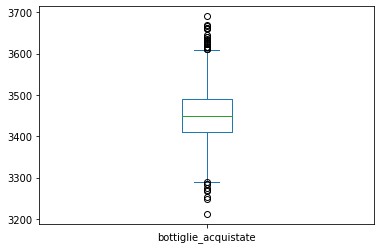

In [4]:
acquistate = ac.bottiglie_acquistate
acquistate.plot.box()
plt.show()

Ho scelto di rappresentare le bottiglie acquistate tramite un boxplot per evidenziare il range di valori coperti dal dataset, e la concentrazione dei valori.
Dal grafico si nota che la distribuzione appare centrale, con molti valori in un intervallo ristretto e con la presenza di svariati outlier.

**3.** L'ipotesi fatta all'inizio dell'esercizio 3 dovrebbe consentire di utilizzare un istogramma in alternativa alla rappresentazione del punto precedente; perchè? Visualizzate tale istogramma, scegliendo opportunamente il numero di intervalli da considerare.

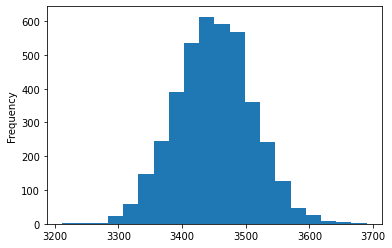

In [5]:
acquistate.plot.hist(bins=20)
plt.show()
#perchè 20? boh sembrava un numero adatto per un bel grafico indicativo ma non troppo approssimato

sapere che ogni valore di bottiglie_acquistate corrisponde a un valore assunto da $C_{TOT}$, come sopra definito, permette di trattare l'attributo come se fosse continuo, rendendo ragionevole l'utilizzo dell'istogramma

**4.** Valutate l'ipotesi che vi sia una relazione di tipo diretto tra gli attributi *bottiglie_acquistate* e *temperatura*, utilizzando in modo opportuno sia un metodo grafico sia un indice numerico. Commentate i risultati ottenuti.

In [6]:
ac.dropna().temperatura.unique()

array([18., 39.,  0., -3., 29., -4.,  9., 35.,  5.,  1., 11.,  3.,  2.,
       19., 32., 34.,  7., 31., 30.,  4., -1., 36.,  6., 25., 28., 21.,
       26., 13., 20., 16., 15., 22., 23., 12., -5., 24., 37., 10., 33.,
       27., 17., 14., -2.,  8., 38.])

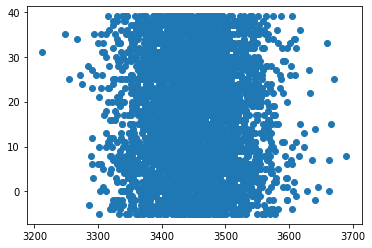

In [7]:
plt.scatter(ac.bottiglie_acquistate, ac.temperatura)
plt.show()

In [8]:
cor = ac.bottiglie_acquistate.corr(ac.temperatura)
print("indice di correlazione lineare:", cor)

indice di correlazione lineare: -0.006180512682684299


Dal grafico in cui si notano valori sostanzialmente invariati di un attributo al variare dell'altro, e dal valore dell'indice di correlazione molto prossimo allo zero risulta assente alcuna relazione lineare tra i due attributi.

**5.** Una bottiglia d'acqua costa 1€, e il distributore sconta 10 centesimi per ogni bottiglia resa. Aggiungete al dataset una colonna dal nome *ricavo* che contenga il ricavo settimanale per ogni caso.

In [9]:
ricavo = pd.Series([(ac.bottiglie_acquistate[i]-(0.10*ac.bottiglie_rese[i])) for i in ac.index], name="ricavo")
#dovrei trattare più finemente i NaN? probabile..
ricavo

0       3348.6
1          NaN
2       3328.7
3       3428.4
4       3148.0
         ...  
3995    3411.4
3996    3253.1
3997    3339.8
3998    3356.3
3999    3266.4
Name: ricavo, Length: 4000, dtype: float64

In [10]:
print(ac.index)

RangeIndex(start=0, stop=4000, step=1)


In [11]:
ac_r = ac
ac_r["ricavo"] = ricavo
ac_r

,bottiglie_acquistate,bottiglie_rese,temperatura,ricavo
0,3481.0,1324.0,18.0,3348.6
1,3463.0,NaN,10.0,NaN
2,3464.0,1353.0,39.0,3328.7
3,3527.0,986.0,0.0,3428.4
4,3367.0,2190.0,-3.0,3148.0
...,...,...,...,...
3995,3516.0,1046.0,7.0,3411.4
3996,3420.0,1669.0,32.0,3253.1
3997,3487.0,1472.0,14.0,3339.8
3998,3552.0,1957.0,9.0,3356.3


**6.** Valutate l'ipotesi che il ricavo settimanale di ogni acquisto sia ben descritto da un modello normale, commentando i risultati ottenuti.

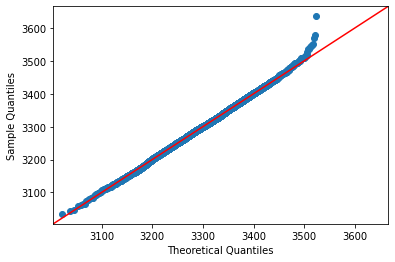

In [12]:
sm.qqplot(ac_r.ricavo, dist=st.norm(loc=ac_r.ricavo.mean(), scale=ac_r.ricavo.std()), line="45")
plt.show()

In [13]:
media = ac_r.ricavo.mean()
mediana = ac_r.ricavo.quantile(0.5)
print("media={}, mediana={}".format(media, mediana))

media=3299.6993485342023, mediana=3300.0


Dal grafico qqplot con quantili teorici corrispondenti ai quantili empirici (per quasi tutti i valori), e dal valore essenzialmente equivalente di media e mediana, si può dedurre che il ricavo sembra seguire una distribuzione normale.

**7.** Alla luce dei risultati ottenuti al punto precedente, è opportuno rivedere le ipotesi fatte all'inizio dell'esercizio 3? Perchè? E quali ipotesi devono essere riesaminate?

???

**8.** Valutate l'ipotesi che il numero di bottiglie acquistate sia ben descritto da un modello normale, commentando i risultati ottenuti.

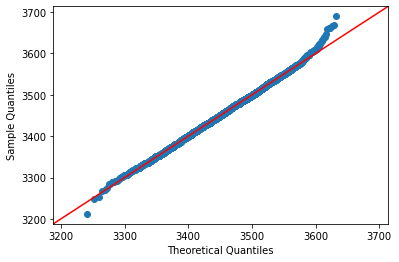

In [14]:
sm.qqplot(ac_r.bottiglie_acquistate, dist=st.norm(loc=ac_r.bottiglie_acquistate.mean(), scale=ac_r.bottiglie_acquistate.std()), line="45")
plt.show()

In [15]:
print(ac.index)

RangeIndex(start=0, stop=4000, step=1)


Valgono considerazioni analoghe al 4.6

### Esercizio 5

In questo esercizio interpreteremo i valori dell'attributo *bottiglie_acquistate* come un campione casuale estratto da una popolazione distribuita come la variabile aleatoria $C_{tot}$ definita nell'esercizio 3, e i valori dell'attributo *ricavo* come un campione casuale estratto da una popolazione $T$.

**1.** Stimate il valore atteso della popolazione descritta dalla variabile aleatoria $C_{tot}$, indicando la dimensione del campione utilizzato e specificando eventuali proprietà dello stimatore utilizzato.

In [16]:
print("valore atteso:",ac.bottiglie_acquistate.mean())
print("dimensione campione:", len(ac.bottiglie_acquistate.dropna()))

valore atteso: 3450.124124124124
dimensione campione: 3996


Lo stimatore usato è la media campionaria, che è sempre uno stimatore non deviato (bias nullo) per il valore atteso. La media campionaria è inoltre consistente in media quadratica per il valore atteso.

**2.** Stimate la deviazione standard della popolazione descritta dalla variabile aleatoria $C_{tot}$,  specificando eventuali proprietà dello stimatore utilizzato. La dimensione del campione utilzzato è la stessa del punto precendete? Perchè?

In [17]:
print("valore atteso:",math.sqrt(ac.bottiglie_acquistate.var()))
print("dimensione campione:", len(ac.bottiglie_acquistate.dropna()))

valore atteso: 60.03789465497488
dimensione campione: 3996


Lo stimatore usato è la varianza campionaria, che è uno stimatore non deviato per la varianza campionaria, ma dato che si cerca il valore della deviazione standard, è stata calcolata la radice quadrata della varianza, eliminando la garanzia di correttezza (non sappiamo se il bias sia nullo o no).
La dimensione del campione è la stessa poichè si stanno analizzando due proprietà della stessa popolazione.

**3.** Il magazzino del distributore riceve ogni settimana 3600 bottiglie. Come potete indicare, in funzione di un'appropriata quantità precedentemente utilizzata, l'evento $E$ che si verifica se queste bottiglie non sono sufficienti a soddisfare la domanda dei clienti?

L'evento $E$ corrisponde a una richiesta , o acquisto complessivo, di più di 3600 bottiglie, ovvero al caso in cui $C_{TOT}>3600$.  
Segue che $P(E)$ = $1-P(C_{TOT}<=3600)$

**4.** Sulla base del risultato del punto 8 dell'esercizio 4, calcolate la probabilità dell'evento $E$ desritto al punto precedente.

In [18]:
e = ac.bottiglie_acquistate.mean()
s = math.sqrt(ac.bottiglie_acquistate.var())
p_E = 1 - st.norm(loc=e, scale=s).cdf(3600)
print("P(E)=", p_E)

P(E)= 0.006273854495658315


**5.** Stimate il valore atteso della popolazione $T$, indicando quale stimatore avete utilizzato.

In [19]:
print("valore atteso:", ac_r.ricavo.mean())

valore atteso: 3299.6993485342023


Lo stimatore usato è la media campionaria.

**6.** Siete in grado di calcolare la probabilità che la stima fatta al punto precedente disti, per eccesso o per difetto, più di 10€ rispetto al valore sconosciuto?

In [20]:
n = len(ac_r.ricavo.dropna())
s_r = ac_r.ricavo.std()
p = 1 - st.norm(loc=0, scale=1).cdf((10*math.sqrt(n))/s_r)
p

1.1102230246251565e-15